In [2]:
import pandas as pd # pandas is a dataframe library
import numpy as np # numpy is a numerical library
import matplotlib.pyplot as plt # matplotlib is a plotting library

In [3]:
df = pd.read_csv('data copy.csv') # read in the data
# df.head() # show the first 5 rows
# df.tail() # show the last 5 rows
# df.info() # Prints the dataframe's information
# print(df.count()) # Prints the number of rows and columns

df = df.dropna() # drop all rows with missing values
# drop redundant data in row


In [4]:
from sklearn.model_selection import train_test_split # train_test_split is a function that splits the data into training and testing sets

x = df.drop('Type', axis=1) # drop the `Type` column from the dataframe
y = df['Type'] # get the `Type` column from the dataframe

In [5]:
# test_size is the percentage of data to be used for testing
# random_staet is the seed for the random number generator
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# count x_train
# print(x_train.count())
print(x_test.count())

Age            80
Duration       80
Frequency      80
Location       80
Character      80
Intensity      80
Nausea         80
Vomit          80
Phonophobia    80
Photophobia    80
Visual         80
Sensory        80
Dysphasia      80
Dysarthria     80
Vertigo        80
Tinnitus       80
Hypoacusis     80
Diplopia       80
Defect         80
Ataxia         80
Conscience     80
Paresthesia    80
DPF            80
dtype: int64


In [6]:
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler is a scaler that scales the data to a range of 0 to 1
x_train = MinMaxScaler().fit_transform(x_train) # fit the scaler to the training data
x_test = MinMaxScaler().fit_transform(x_test) # fit the scaler to the testing data

# min max normalization formula:
# (x - min) / (max - min)

In [43]:
from sklearn.neural_network import MLPClassifier

# best of hidden layern and neurons nodes for small data set
# hidden_layer_sizes = (10, 10, 10)

# best max_iter for small data set
# max_iter = 1000

# exhaustive search for best parameters
# for hidden_layer_sizes in [(10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10)]:
#     for max_iter in [1000, 2000, 3000]:
#         mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter)
#         mlp.fit(x_train, y_train)
#         print('Training set score: %f' % mlp.score(x_train, y_train))
#         print('Test set score: %f' % mlp.score(x_test, y_test))
#         print('Hidden layer sizes: %s' % str(hidden_layer_sizes))
#         print('Max iterations: %d' % max_iter)
#         print('\n')


# nn_migraine = MLPClassifier(hidden_layer_sizes=(4,3,2), max_iter=1100, alpha=0.01, activation='logistic', learning_rate_init=0.05)
# nn_migraine = MLPClassifier(hidden_layer_sizes=(23,13), max_iter=450, alpha=0.01, activation='logistic', learning_rate_init=0.05)
nn_migraine = MLPClassifier(hidden_layer_sizes=(23,10), max_iter=650, alpha=0.01, activation='tanh', learning_rate_init=0.05, solver='adam')

# whats the best activation function for the data?
# nn_migraine = MLPClassifier(hidden_layer_sizes=(7,5,3), max_iter=1100, alpha=0.01, activation='logistic', learning_rate_init=0.05)
# nn_migraine = MLPClassifier(hidden_layer_sizes=(7,5,3), max_iter=1100, alpha=0.01, activation='relu', learning_rate_init=0.05)
# nn_migraine = MLPClassifier(hidden_layer_sizes=(7,5,3), max_iter=1100, alpha=0.01, activation='tanh', learning_rate_init=0.05)
# nn_migraine = MLPClassifier(hidden_layer_sizes=(7,5,3), max_iter=1100, alpha=0.01, activation='sigmoid', learning_rate_init=0.05)
# nn_migraine = MLPClassifier(hidden_layer_sizes=(7,5,3), max_iter=1100, alpha=0.01, activation='identity', learning_rate_init=0.05)
# nn_migraine = MLPClassifier(hidden_layer_sizes=(7,5,3), max_iter=1100, alpha=0.01, activation='cosine', learning_rate_init=0.05)

# hidden_layer_sizes is the number of neurons in each hidden layer
# hidden_layer_sizes have three params: (number of neurons in the first layer, number of neurons in the second layer, number of neurons in the third layer)
# max_iter is the number of iterations to perform
# alpha is the learning rate
# verbose is a boolean that determines if the algorithm should print out the progress of the training
# learning rate is the rate at which the weights are updated
# activation is the activation function
# logistic is the activation function
# formula of logistic function
# f(x) = 1 / (1 + e^(-x))

nn_migraine.fit(x_train, y_train)


MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(23, 10),
              learning_rate_init=0.05, max_iter=650)

In [44]:
y_pred = nn_migraine.predict(x_test) # predict the labels of the testing data

In [45]:
from sklearn.metrics import accuracy_score # accuracy_score is a function that calculates the accuracy of the model
round(accuracy_score(y_test, y_pred), 5) # round the accuracy to 5 decimal places
# convert to percentages
round(accuracy_score(y_test, y_pred) * 100, 5)


86.25

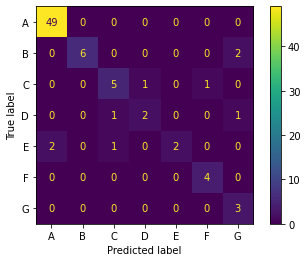

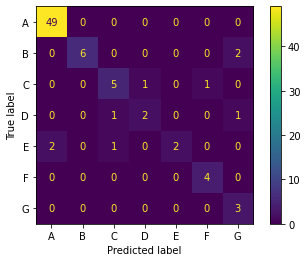

              precision    recall  f1-score   support

           A       0.96      1.00      0.98        49
           B       1.00      0.75      0.86         8
           C       0.71      0.71      0.71         7
           D       0.67      0.50      0.57         4
           E       1.00      0.40      0.57         5
           F       0.80      1.00      0.89         4
           G       0.50      1.00      0.67         3

    accuracy                           0.89        80
   macro avg       0.81      0.77      0.75        80
weighted avg       0.91      0.89      0.88        80



In [41]:
# from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
# show confusion matrix
# plot_confusion_matrix(nn_migraine, x_test, y_test, normalize='true')
# plot_confusion_matrix(nn_migraine, x_test, y_test,display_labels=nn_migraine.classes_)
# expand the plot to a full size figure


# ConfusionMatrixDisplay.from_predictions
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred).plot()
ConfusionMatrixDisplay.from_estimator(nn_migraine, x_test, y_test).plot()
# the from_estimator does is it creates a confusion matrix from the predictions of the model
plt.show()

# fig = plot_confusion_matrix(
#     nn_migraine,
#     x_test,
#     y_test,
#     display_labels=nn_migraine.classes_,
#     # normalize=True, 
#     title='Normalized confusion matrix')
# fig.figure.suptitle('Confusion matrix, without normalization')
# plt.show()
# confusion matrix is a table that shows the number of times the model predicted the correct class and the number of times the model predicted the wrong class
# the diagonal of the matrix is the number of times the model predicted the correct class
# the off-diagonal of the matrix is the number of times the model predicted the wrong class
# the accuracy is the percentage of correct predictions

print(classification_report(y_test, y_pred))

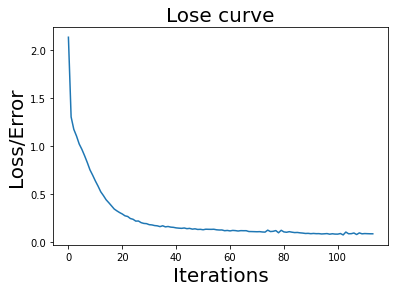

In [42]:
# what the accuracy? macro avg, and weighted avg?
# macro avg is the average of the accuracy of each class
# weighted avg is the average of the accuracy of each class weighted by the number of instances of that class in the testing data
# the accuracy is the percentage of correct predictions

# what the precision, recall, f1-score, and support?
# precision is the percentage of correct positive predictions
# recall is the percentage of correct positive predictions
# f1-score is the average of the precision and recall
# support is the number of instances of the class in the testing data

# lose curve
import matplotlib.pyplot as plt

# print the loss value in number
# print(nn_migraine.loss_curve_) 


plt.plot(nn_migraine.loss_curve_)
plt.title('Lose curve', fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('Loss/Error', fontsize=20)
plt.show()

In [12]:
# visual layers and nodes using visualkeras
# visualkeras.plot_model(nn_migraine, to_file='model.png')
# visualkeras.plot_model(nn_migraine, to_file='model.png', show_shapes=True)
# visualkeras.plot_model(nn_migraine, to_file='model.png', show_shapes=True, show_layer_names=True)
# visualkeras.plot_model(nn_migraine, to_file='model.png', show_shapes=True, show_layer_names=True, show_node_names=True)
